In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# Exact solution to the scalar advection equation
<hr style="border-width:4px; border-color:coral"></hr>

This notebook provides a function which solve the equation

\begin{equation}
q_t + cq_x = Q(x,t)
\end{equation}

on the domain $[a,b]\times[0,T]$.  The velocity $c$ is assumed to be constant. By Duhamel's Principle, the exact solution is given by 

\begin{equation}
u(x,t) = u(x-ct,0) + \int_0^t Q(x - c(t -\tau), \tau) \, d\tau
\end{equation}

We will use a quadrature rule to evaluate the convolution in the solution.  

The routine below solves the scalar advection equation for $N+1$ equally spaced points of $x \in [a,b]$.  The solution $q(x_i,t)$, $i = 0,1,2,\dots,N$ is returned in an array, along with an array $x$ containing the $x$ values.  

In [2]:
# a=1; b=-1; N=1001

from scipy.integrate import quad

def qinit_default(x):
    return zeros(x.shape)


def Q_default(x,t):
    return zeros(x.shape)

def adv_exact(a,b,t,N,init=qinit_default, Q=Q_default, c=1):
    
    xv = linspace(a,b,N+1)
    
    def f(tau):
        return Q(x-c*(t-tau), tau)
    
    qv = empty(xv.shape)
    for k,x in enumerate(xv):
        I = quad(f,0,t)
        qv[k] = init(x-c*t) + I[0]

    return qv,xv
    

In [3]:
from scipy.integrate import quad

def qinit_default(x):
    return zeros(x.shape)

def Q_default(x,t):
    return zeros(x.shape)

def adv_exact(a,b,t,N,init=qinit_default, Q=Q_default, c=1):
    
    xv = linspace(a,b,N+1)
    
    def f(tau):
        return Q(x-c*(t-tau), tau)
    
    qv = empty(xv.shape)
    for k,x in enumerate(xv):
        I = quad(f,0,t)
        qv[k] = init(x-c*t) + I[0]

    return qv,xv

## Sample problem

In this example, we solve the advection problem on the domain $[0,1]$. We start with initial conditions $q(x,0) = 0$ (the default initial conditions) and supply a steady source term 


\begin{equation}
Q(x,t) = e^{-100 (x-0.1)^2}
\end{equation}

near the left edge of the domain.   We solve the problem for a range of time values $t \in [0,T]$ and plot the solution.



In [4]:
# -----------------------------
# Problem parameters
#     -- Define Q(x,t) here
# -----------------------------

# Domain [a,b]
a = 0
b = 1

# Velocity
c = 1

# Final time 
T = 2

def Q_src(x,t):
    # return sin(2*pi*t)*exp(-100*(x-0.1)**2)
    return exp(-100*(x-0.1)**2)

# -----------------------------
# Numerical parameters
# -----------------------------

# Number of mesh cells in x
N = 256

# Number of time steps
M = 16
tv = linspace(0,T,M+1)

# -----------------------------
# Solution
# -----------------------------

qmat = empty((M+1,N+1))

for k in range(M+1):
    qmat[k],x = adv_exact(a,b,tv[k],N,Q = Q_src, c=c)


### Plot

Below, we plot the solution over the range of times computed above. 

<IPython.core.display.Javascript object>


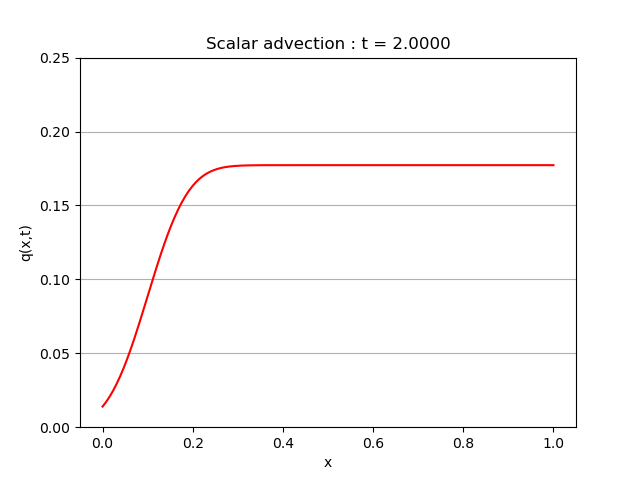

In [5]:
fig = figure(1)
clf()

hdl, = plot(x,qmat[0],'r')


t = tv[0]
tstr = 'Scalar advection : t = {:.4f}'.format
htitle = title(tstr(0))

xlabel('x')
ylabel('q(x,t)')
htitle.set_text(tstr(t))

grid(axis='y')


for m in range(M+1):
    hdl.set_ydata(qmat[m])
#     plot(x,qmat[m],'r')
    ylim([0,0.25])
    
    t = tv[m]
    htitle.set_text(tstr(t))
    
    fig.canvas.draw()   
    pause(0.2)
 
# # legend()

show()